# **PyTorch Tutorial**

### **Please make a copy of this notebook to edit.**


Hello! In this notebook, we will introduce PyTorch, an essential machine learning framework for Python. Documentation for the package can be found [here](https://pytorch.org/docs/stable/index.html). Additional resources on how to use PyTorch can be found all around the Internet, though we strongly encourage you to fully explore all of the materials on the PyTorch website prior to moving to external sources.

This notebook assumes that you have already installed PyTorch on your device. If you have not yet installed PyTorch, please follow the instructions [here](https://pytorch.org/get-started/locally/).

<a name="outline"></a>
## **Outline**
1. [What is PyTorch and Why Do We Use It?](#part1)
2. [Working with Tensors](#part2)
3. [Word Embeddings](#part3)
4. [Building a FFNN](#part4)

<a name="part1"></a>
[[^^^]](#outline)
## **Part 1: What is PyTorch and Why Do We Use It?**

PyTorch is a robust deep learning framework used by academics and researchers alike to advance scientific discoveries in a number of fields. Originally developed by researchers at Facebook (now Meta AI), PyTorch offers a straightforward pathway into the world of machine learning.

We are using PyTorch in this class for a number of reasons. Firstly, PyTorch is very "pythonic" and easy-to-learn compared to some other machine learning frameworks. Secondly, the rich documentation and expansive community allow for less frustrations when it comes to developing and debugging models. Thirdly, there are a number of behind-the-scenes operations that occur (namely, dynamic computation graphing) which helps us optimize our models and their training.

For more information on key features of PyTorch, please consider the following links:

1. [PyTorch Overview (Video)](https://www.youtube.com/watch?v=RwaVqvZ3xo8)
2. [Advantages of PyTorch in Comparison to Tensorflow (Video)](https://www.youtube.com/watch?v=nbJ-2G2GXL0)

<a name="part2"></a>
[[^^^]](#outline)
## **Part 2: Working with Tensors**

In this section, we'll go over the basic properties and operations on tensors. This is by no means an exhaustive list. If you _really_ want to get into the details, please see the PyTorch documentation [here](https://pytorch.org/docs/stable/index.html).

#### **2.1: Tensor Basics**

In [1]:
import torch
import numpy as np

# Setting a seed so we can all get the same numbers
torch.manual_seed(123)

Tensors are very easy to initialize! One way of doing so is by converting a list of numerical values:

In [2]:
# Converting list to tensor
data = [0, 10, 11]
t1 = torch.Tensor(data)
print(t1)

tensor([ 0., 10., 11.])


In [3]:
# Examining aspects of our first tensor:
print(t1.type)
print(t1.shape)

<built-in method type of Tensor object at 0x0000023181DBA030>
torch.Size([3])


You can also convert numpy arrays to tensors:

In [14]:
# A tensor of more complex dimensionality:
data_2_np = np.random.rand(2,3)

t2 = torch.from_numpy(data_2_np)
print(t2)

tensor([[0.5058, 0.8798, 0.2380],
        [0.8197, 0.9978, 0.4823]], dtype=torch.float64)


In [15]:
# Examining shape
print(t2.shape)

torch.Size([2, 3])


However, _note the following_:

In [22]:
data_txt = ['The', 'dog', 'barked']

t_txt = torch.Tensor(data_txt)

ValueError: too many dimensions 'str'

Any idea what's going on in the cell above? 

torch.tensor() while it can't handle string data

Finally, some other very useful ways to initialize tensors: rand, ones, and zeros

In [23]:
# Some ways to initialize tensors:
shape = (3, 2,)
t_rand = torch.rand(shape)
t_ones = torch.ones(shape)
t_zeros = torch.zeros(shape)

print(t_rand)
print(t_ones)
print(t_zeros)

tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


#### **2.2: Operations on Tensors**

While tensors are not lists, they do carry many similar properties of lists. You can slice them with indices:

In [31]:
# First row
print('First row of t2:', (t2[0]))

# Second column only
print('Second column only of t2:', t2[:, 1])

# Second row, third item
print('Second row, third item of t2:', t2[1, 2])

First row of t2: tensor([0.5058, 0.8798, 0.2380], dtype=torch.float64)
Second column only of t2: tensor([0.8798, 0.9978], dtype=torch.float64)
Second row, third item of t2: tensor(0.4823, dtype=torch.float64)


... and you can combine them (two different ways!):

In [48]:
# Two ways of combining tensors:
t3 = torch.Tensor([[1,2,3],
                   [4,5,6]])

t4 = torch.Tensor([[4,5,6],
                   [7,8,9]])

# Combining along a given dimension with torch.cat
t_cat = torch.cat((t3, t4), dim=0) # Not the Tompkins Consolidated Area Transport
print(t_cat)
print(t_cat.shape)
print()

# Combining along a new dimension with torch.stack
t_stack = torch.stack((t3, t4), dim=0)
print(t_stack)
print(t_stack.shape)


tensor([[1., 2., 3.],
        [4., 5., 6.],
        [4., 5., 6.],
        [7., 8., 9.]])
torch.Size([4, 3])

tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[4., 5., 6.],
         [7., 8., 9.]]])
torch.Size([2, 2, 3])


Note the differences with the two methods above. Even though we are combining the same two tensors, we get output tensors of different dimensionalities. `torch.cat` takes two (or more) tensors and combines them along the specified dimension (default = 0). `torch.stack` takes two (or more) tensors and combines them along a NEW dimension. As its name suggests, `torch.stack` places two tensors on top of one another in a different dimension. Cool stuff! For more information on `torch.cat`, go [here](https://pytorch.org/docs/stable/generated/torch.cat.html); for more information on `torch.stack`, go [here](https://pytorch.org/docs/stable/generated/torch.stack.html).

We can also sum across multiple dimensions (default = 0):

In [85]:
# Summing
print(t3)
print()

# Across columns
print(t3.sum(dim=0))
print()

# Across rows
print(t3.sum(dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor([5., 7., 9.])

tensor([ 6., 15.])


... and do do element multiplication:

In [49]:
# Element multiplication
t_em_1 = t3 * t4
t_em_2 = t3.mul(t4)

print(t_em_1)
print(t_em_2)

tensor([[ 4., 10., 18.],
        [28., 40., 54.]])
tensor([[ 4., 10., 18.],
        [28., 40., 54.]])


... along with matrix multiplication:

In [50]:
# Matrix multiplication
t_mm_1 = t3 @ t3.T
t_mm_2 = t3.matmul(t3.T)

print(t_mm_1)
print(t_mm_2)

tensor([[14., 32.],
        [32., 77.]])
tensor([[14., 32.],
        [32., 77.]])


Note that there are multiple ways of completing this operations.

<a name="part3"></a>
[[^^^]](#outline)
## **Part 3: Word Embeddings**

Now that we have become familiar with the basic concepts of tensors and their various properties, let's begin moving into NLP territory. As the title of this section indicates, we will begin our journey with word embeddings, an essential concept in NLP.

In [51]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

As described in previous lectures, basic word embeddings serve as a computational approach to the distributional hypothesis: words that are similar to each other occur in similar contexts. These embeddings can then inform our model of various "semantic" features that are present in language data.

To provide a more practical example of how embeddings operate, consider the following nonsense sentences concerned with various kinds of aviation-related things:

In [52]:
tiny_dataset = ['The helicopter engine broke through the rocket sky.',
                'The helicopter engine soared above the drone sky.',
                'The drone engine broke through the rocket sky'
                'The drone engine soared above the helicopter sky',
                'The drone engine knocked out the drone sky',
                'The rocket engine broke through the helicopter sky'
                'The rocket engine soared above the helicopter sky',
                'The rocket engine knocked out the helicopter sky',
                'The rocket engine shredded below the drone sky',
                'The bee wings broke through the goose sky.',
                'The bee wings soared above the goose sky.',
                'The bee wings knocked out the eagle sky.',
                'The eagle wings broke through the goose sky.',
                'The eagle wings soared above the eagle sky.',
                'The eagle wings knocked out the bee sky.',
                'The goose wings broke through the goose sky.',
                'The goose wings soared above the eagle sky.',
                'The jet wings soared above the bee sky.',
                'The jet engine broke through the jet sky.']

Wow -- that's a _lot_ of co-occurrences! Let's use this tiny, repetitive dataset to build very simple 2-dimensional embeddings based on counts.

For now, let's focus our attention on the machines ("helicopter", "drone", "rocket") and two contexts ("engine" and "sky"). To save some time, the following table shows the number of times that each machine appears next to "engine" and "sky":


|            | context: engine | context: sky |
|------------|-----------------|--------------|
| helicopter | 2               | 4            |
| drone      | 3               | 3            |
| rocket     | 4               | 2            |


For the purposes of this lecture, we will ignore that each machine is always followed by "the". I'll leave it up to you how this may (or may not) affect our embedding representation!


In this example, we can take each context in the table above as a dimension (x="engine", y="sky") and plot the coordinates for each machine according to its counts in each dimension:

![2d_embeddings](https://drive.google.com/uc?export=view&id=1HSmuy4Epym_dBBzXQScTs5LGZz7ScWZU)

In the graph above, we see that "helicopter" and "drone" are as close as "rocket" and "drone" (aka θ1 = θ2, where θ = cosine similarity. More on cosine similarity later!). However, "helicopter" and "rocket" appear to be further apart.


What if we consider more dimensions? Let's add "wings" to our contexts as a third dimension. For our words, let's add "bee", "eagle", "goose", and "jet". Our new table looks something like this:

|            | context: engine | context: sky | context: wings |
|------------|-----------------|--------------|----------------|
| helicopter | 2               | 4            | 0              |
| drone      | 3               | 3            | 0              |
| rocket     | 4               | 2            | 0              |
| bee        | 0               | 2            | 3              |
| goose      | 0               | 4            | 2              |
| eagle      | 0               | 3            | 3              |
| jet        | 1               | 1            | 1              |


We can then use a three-dimensional plot with axes x="engine", y="sky", and z="wings" to plot the counts of each word in context:


![3d_embeddings](https://drive.google.com/uc?export=view&id=1crOuM7Zqv8iFqew8-fUDFAIoDnHKQapP)

Above, we can see a clear difference in the vector representations between the words that co-occur with "wings" and those that do not. Cool stuff!


**An important note:** For the purposes of explication, we map a clear relationship in the two examples above: each context is a dimension, and each instance of a word in that context serves as a count, which in turn contributes to the word's exact vector representation. However, these vectors *do not* require such a clear mapping. Word embeddings with *n*-dimensions do not require an *n* that is equal to the total number of contexts. Instead, we can reduce (or increase) *n* to create more abstract, less interpretable dimensions. We will discuss this in the following sections!


#### **3.1 PyTorch embeddings**
Okay, enough with the background!

Previously, we mentioned that PyTorch tries to make your life easier. Let's get into the first example of it doing so! Consider the sentence "Hello class":

In [53]:
# A very basic example:
word_to_ix = {"hello": 0, "class": 1}

To initialize embeddings, we can use `nn.Embedding` and specify two dimensions: the number of embeddings you need, and the dimensionality of the embeddings. Let's create embeddings of dimensions 2x5 (2 words in the vocab, each embedding has 5 dimensions):

In [58]:
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings

# Looking at class:
lookup_tensor = torch.tensor([word_to_ix["class"]], dtype=torch.long)     # Note that this is blank tensor of the words ids:
print(lookup_tensor)

# And then the embeddings initialize
hello_embed = embeds(lookup_tensor)
print(hello_embed)

tensor([1])
tensor([[ 0.9687,  0.0814,  0.3012, -0.2114,  0.3071]],
       grad_fn=<EmbeddingBackward0>)


Note that these are initialized embeddings are initialized randomly at first! If we want them to better approximate the semantics of our data, then we will need to undergo model training. At the moment, however, they will appear to be pretty random.

We now know how to create PyTorch embeddings. Woo hoo! However, how can we _analyze_ them? One method of doing so is checking the cosine similarity between two embeddings (see lecture slides for more information).

Luckily for us, PyTorch has a built-in CosineSimilarity function: `nn.CosineSimilarity`. While we would traditionally apply this function to word embeddings, _we will not do so here_ (don't worry, we will soon!), as we do not have trained embeddings. As such, we will use tensors to demonstrate cosine similarity. Let's initialize five tensors (feel free to mess around with these numbers to experiment with cosine similarity):

In [68]:
# PyTorch's built-in Cosine Similarity function:
c1 = torch.Tensor([4,6,8])
c2 = torch.Tensor([4,7,8])
c3 = torch.Tensor([0,12,24])
c4 = torch.Tensor([-59, 78, -14])
c5 = torch.Tensor([16, 24, 32])
cs = nn.CosineSimilarity(dim=0, eps=1e-6)


How do you think these will pattern? Which will be most similar? Which will be the least similar?

In [69]:
# c1 compared to c2
print('c1, c2:', cs(c1, c2))

# c1 compared to c3
print('c1, c3:', cs(c1, c3))

# c1 compared to c4
print('c1, c4:', cs(c1, c4))

# c1 compared to c5
print('c1, c5:', cs(c1, c5))

c1, c2: tensor(0.9973)
c1, c3: tensor(0.9135)
c1, c4: tensor(0.1128)
c1, c5: tensor(1.)


For more information on `nn.Embedding`, look [here](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html). For more information on `nn.CosineSimilarity`, look [here](https://pytorch.org/docs/stable/generated/torch.nn.CosineSimilarity.html).

#### **3.2 An Example of Pre-trained Embeddings: GloVe Embeddings**

While it is essential to know how to train your own embeddings (as pertains to whatever task you are trying to complete), a number of pre-trained embeddings exist. In this tutorial, we will be using the GloVe embeddings as outlined in [Pennington et al. (2014)](https://nlp.stanford.edu/pubs/glove.pdf). Documentation for GloVe embeddings can be found [here](https://nlp.stanford.edu/projects/glove/).

First, we must download the GloVe embeddings. The following block of code will do this for you, but it may take some time to run!

In [71]:
! pip install torchtext

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.9 MB 2.8 MB/s eta 0:00:01
   ----------------------------------- ---- 1.7/1.9 MB 13.8 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 12.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 1.3/198.6 MB 42.9 MB/s eta 0:00:05
    --------------------------------------- 2.8/198.6 MB 35.7 MB/s eta 0:00:06
   - -------------------------------------- 5.7/198.6 MB 45.4 MB/s eta 0:00:05
   - -------------------------------------- 8.2/198.6 MB 47.5 MB/s eta 0:00:05
   -- ------------------------------------- 10.6/198.6 MB 50.4 MB/s eta 0:00:04
   -- ------------------------------------- 13.3/198.6 MB 54.4 MB/s eta 0:00:04
   --- ------------------------------------ 15.5/198.6 MB 46.7 MB/s eta 0:00:0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.0 requires torch==2.2.0, but you have torch 2.2.1 which is incompatible.
torchvision 0.17.0 requires torch==2.2.0, but you have torch 2.2.1 which is incompatible.


In [72]:
import torchtext

# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=100)    # embedding size = 50

.vector_cache\glove.6B.zip: 862MB [02:40, 5.38MB/s]                               
100%|█████████▉| 399999/400000 [00:16<00:00, 23641.53it/s]


Thankfully for us, GloVe embeddings are _incredibly_ easy to use. All you need to do to find the embedding for a word is to look it up in the embedding dictionary:

In [73]:
# Looking at an embedding for the word 'photograph'
print(glove['photograph'])

print(glove['photograph'].shape)

tensor([-0.3905, -0.2549, -0.1382,  0.0420,  0.5667,  0.7832, -0.1071, -0.0431,
         0.0406,  0.0567,  0.6232,  0.0259,  0.6145, -0.3968,  0.5271,  1.0976,
         1.0748, -0.0540,  0.5088, -0.6904, -0.4768, -0.1957, -0.2951, -0.0348,
         0.5413, -0.5468, -0.2390,  0.0017,  0.1913, -0.1182,  0.5662, -0.0543,
         0.3056,  0.7888,  0.0410, -0.0877, -0.0585, -0.1933,  0.2155, -0.3460,
        -0.2254,  0.0618,  0.1725,  0.4942, -0.3798,  0.1681,  0.0382,  0.0229,
        -0.2144, -0.2600,  0.7728,  0.2907,  0.3781,  1.1977,  0.1553, -1.5200,
        -0.5735,  0.0732,  0.6663, -0.5527, -0.1163,  1.6117,  0.0992, -0.2084,
         0.6418,  0.2522,  0.8185,  0.5056, -0.2862,  0.4347,  0.0067,  0.3870,
         0.4920,  0.1046,  0.3839,  0.6068,  0.5392,  0.0242, -0.3608, -0.3601,
         0.1969, -0.1676,  0.7339, -0.2906, -0.2308, -1.0330,  0.5002, -0.2225,
         0.2336, -0.1754,  0.2848, -0.4200,  1.1582, -0.6518, -0.2022, -0.3428,
        -0.4344, -0.4060, -0.2982, -0.27

There are a number of ways to measure similarity between vectors (some of which can be found [here](https://developers.google.com/machine-learning/clustering/similarity/measuring-similarity). One way of doing so is by calculating the _Euclidean Distance_, which is captures the difference between the ends of vectors. The larger the Euclidean Distance, the further away the vectors are in semantic space. To calculate Euclidean Distance, we take the vector norm of the two tensors, which essentially calculates the difference between the vectors at each level of embedding.

In [74]:
# Euclidean distance
x = glove['photograph']
y = glove['picture']
z = glove['sculpture']
print('EucDis between x, y:', torch.norm(y - x))
print('EucDis between x, z:', torch.norm(z- x))

EucDis between x, y: tensor(4.1111)
EucDis between x, z: tensor(5.4529)


We can also re-use our cosine similarity function from earlier to check out how similar the vectors are in semantic space:

In [75]:
# Cosine sim

# Photograph & picture
print('CoSim between x, y:',cs(x, y))

# Photograph & sculpture
print('CoSim between x, z:',cs(x, z))

CoSim between x, y: tensor(0.6862)
CoSim between x, z: tensor(0.4489)


Let's move on to another example. Given the following, how do you think the cosine similarities will vary?

In [76]:
# Note the following:
c = glove['cat']
k = glove['kitten']
d = glove['dog']

# Cat & kitten
print('CoSim between cat and kitten:', cs(c, k))

CoSim between cat and kitten: tensor(0.5581)


In [77]:
# Cat & dog
print('CoSim between cat and dog:', cs(c, d))

CoSim between cat and dog: tensor(0.8798)


Hold up! Let's _paws_ for a moment: why are cat & dog more similar than cat & kitten?

Let's try to pick apart which words are close to each other:

In [78]:
# Function from this link: https://www.cs.toronto.edu/~lczhang/321/lec/glove_notes.html

# This function finds which words are closest to one another via Euclidean Distance:
def print_closest_words(vec, n=5):
    dists = torch.norm(glove.vectors - vec, dim=1)                # Compute Euclidean Distances to all words
    lst = sorted(enumerate(dists.numpy()), key=lambda x: x[1])    # Sort by distance
    for idx, difference in lst[1:n+1]: 					                  # Take the n most related words
        print(glove.itos[idx], difference)

In [79]:
# Looking at cats!
print_closest_words(glove["cat"], n=10)

dog 2.681131
rabbit 3.6489706
cats 3.6892004
monkey 3.7469323
puppy 3.9275599
pet 3.949972
dogs 4.0555873
rat 4.131533
mouse 4.1978264
spider 4.2696805


In [80]:
# Looking at kitten
print_closest_words(glove["kitten"], n=10)

puppy 3.6014626
tomboy 3.9557345
moppet 4.018781
pooch 4.0337315
kittens 4.0392575
yorkie 4.0828166
pterodactyl 4.0928903
tarantula 4.0984063
dachshund 4.104253
milkmaid 4.105781


Here, the only carry-over between "cat" and "kitten" is "puppy". This suggests that "cat" and "kitten" have very different co-occurence distributions in the training data.

We can also implement some of the "vector math" from previous lectures:

In [81]:
# The most famous word math example (include visualization)
print_closest_words(glove['king'] - glove['man'] + glove['woman'])

queen 4.081079
monarch 4.6429076
throne 4.9055004
elizabeth 4.921559
prince 4.981147


In [82]:
# Any predictions about this one:
print_closest_words(glove['avian'] - glove['fly'])

h3n2 6.088272
h9n2 6.130206
h9 6.1741743
h-7 6.19326
epstein-barr 6.2125893


While embeddings are certainly fun tools to play with, it's important to remember that there are some implicit biases encoded into their structure; this is a consequence of the data the embeddings were trained on. Consider the following examples:

In [83]:
print_closest_words(glove['firefighter'] - glove['man'] + glove['woman'])

paramedic 4.602735
schoolteacher 4.8263574
nurse 5.001752
homemaker 5.0627832
janitor 5.10184


In [84]:
print_closest_words(glove['firefighter'] - glove['woman'] + glove['man'])

fireman 3.9453492
mechanic 4.8609853
ranger 4.8943105
watchman 4.95111
paramedic 4.986004


<a name="part4"></a>
[[^^^]](#outline)
## **Part 4: Building a Feed Forward Neural Network (FFNN)**

It is now time to learn how to construct your first neural model! This section is a Frankensteinien creation from a couple different PyTorch tutorials found on the [Pytorch website tutorials](https://pytorch.org/tutorials) and the [Udacity Deep Learning with Pytorch repository](https://github.com/udacity/deep-learning-v2-pytorch/tree/master/intro-to-pytorch).

To begin, let's state the task at hand: _identifying text in an image_. In order to start this task, we will need a dataset that provides us text in image form. The MNIST dataset consists of greyscale handwritten digits 0-9 (see image below). Each image of a digit is 28x28 pixels.

![](https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3a95d118f9df5a86826e1791c5c100817f0fd924/intro-to-pytorch/assets/mnist.png "MNIST image examples")

We need to download this dataset from the `torchvision` package using the code below. This code will also create training and test datasets for us!

In [86]:
from torchvision import datasets, transforms
import torch

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 29123250.18it/s]


Extracting C:\Users\bhave/.pytorch/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\bhave/.pytorch/MNIST_data/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 9131978.43it/s]

Extracting C:\Users\bhave/.pytorch/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\bhave/.pytorch/MNIST_data/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 17396193.19it/s]


Extracting C:\Users\bhave/.pytorch/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\bhave/.pytorch/MNIST_data/MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 1665838.47it/s]

Extracting C:\Users\bhave/.pytorch/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\bhave/.pytorch/MNIST_data/MNIST\raw



We will want to feed our images into the model one at a time, so we will use the iter() function to accomplish this goal:

In [87]:
# Getting the data ready
dataiter = iter(trainloader)
images, labels = next(dataiter)

We should also know what our data look like:

In [88]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


So now we see that each image is of 28x28 pixels, and there are 64 images in a batch. The 1 indicates that it's of one color scale (black-white).

Here's what one of the original images looks like:

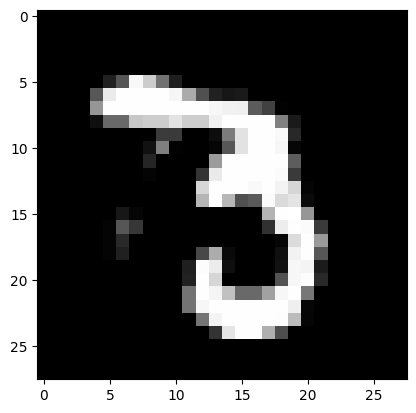

In [89]:
# Visualizing
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

We are now ready to build our model! Reminder: the goal of our model is to identify a piece of text (in this case, a number from 0-9) from an image. To accomplish this goal, we will create for a simple feed forward neural network (FFNN) with the following characteristics:

1. A Linear layer that takes in **784** inputs and outputs **256** hidden units
2. A Linear layer that takes in **256** hidden units and outputs **64** hidden units
3. A Linear layer that takes in **64** hidden units and outputs **10** output units
3. A softmax layer that determines the optimal label for the image (aka a number from 0-9)
4. A Rectified Linear Unit (ReLU) activation function

Thankfully for us, the Pytorch module `nn` makes building neural networks quite simple. Many functions -- Rectified Linear Unit, Softmax, Linear layers, etc. -- are pre-built into the `nn` module. Let's see how this works!

In [91]:
class ffnn(nn.Module):
    def __init__(self, ninp, nhid1, nhid2, nhid3, nout):
        super().__init__()

        # Layers
        # self.embedding = nn.Embedding(num_dict, num_dim) #  Note that there isn't an embedding layer here! Why?
        self.hidden1 = nn.Linear(ninp, nhid1)              # One-hot to vector form, we already have a vector form so Linear is densifying
        self.hidden2 = nn.Linear(nhid1, nhid2)
        self.hidden3 = nn.Linear(nhid2, nhid3)
        self.output = nn.Linear(nhid3, nout)

        # Functions
        self.relu = nn.ReLU()
        self.lsmax = nn.LogSoftmax()

    def forward(self, x):
        # Passing through first
        hid1 = self.hidden1(x)
        hid1_relu = self.relu(hid1)                       # Note that the ReLU function doesn't "learn" anything. It's simply
                                                          # the activation function.
        # Passing through second
        hid2 = self.hidden2(hid1_relu)
        hid2_relu = self.relu(hid2)

        # Passing through second
        hid3 = self.hidden3(hid2_relu)
        hid3_relu = self.relu(hid3)

        # Getting output
        out = self.output(hid3_relu)

        return self.lsmax(out)    # Log Softmax!


**Note on activation functions:** Broadly, activation functions inform our current layer about which neurons can pass on information to the next layer. An important characteristic of these activation functions is that they are *non-linear*. As the name suggests, non-linear activation functions allow our models to make predictions beyond those of simple linear ones, thus helping our models find more intricate patterns within our data and construct more complex representations. This often greatly improves model performance.

A number of non-linear activation functions exist (with PyTorch having many already [built-in](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity). Some common ones are [Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh), [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid), and [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU). Try switching out ReLU with one of these other two to see how your model's performance changes!

We have just defined the model architecture for your FFNN! Great job :)

We will now initialize the model with the necessary dimensions for each layer (see above for dimensions), along with defining our loss criterion ([negative log-likelihood loss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html)) and our optimizer ([stochastic gradient descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)). For our optimizer, we will also define a learning rate: this learning rate determines how quickly/slowly our model will update.



In [94]:
from torch.autograd import Variable


model = ffnn(784, 256, 128, 64, 10)       # DECLARE THE MODEL
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

Looks great, doesn't it? How do you think the model would perform if we ran it right now?

You got it: _very poorly_. We haven't passed it any training data yet! Let's change that. In the following code, we will pass all of the training data through the model 5 times (with each full pass through called an "epoch"). For each image, we'll:

1. zero our gradients to remove any leftovers from the previous training run
2. pass our data through the model
3. calculate the loss
4. perform backpropagation
4. implement our optimizer to tweak our model

That sounds like a _whole_ bunch of things to do, most of which also sound pretty complicated. Some good news: each of those steps is _**one**_ line of code!

Finally, after each epoch, we'll output our loss:

In [95]:
epochs = 25
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        ###TO DO: Training pass###
        optimizer.zero_grad()             # First thing to do! Do NOT forget to do zero your gradients :)
        output = model.forward(images)    # Passing data through our model
        loss = criterion(output, labels)  # Calculating loss
        loss.backward()                   # Backpropagation isn't so scary after all!
        optimizer.step()                  # Performing SGD

        running_loss += loss.item()
    else:
        print(f"Training loss for epoch {e}: {running_loss/len(trainloader)}")

Training loss for epoch 0: 2.2255746103298946
Training loss for epoch 1: 1.6128639542598968
Training loss for epoch 2: 0.836603416403982
Training loss for epoch 3: 0.554729700565084
Training loss for epoch 4: 0.4438975309130988
Training loss for epoch 5: 0.39500649089116785
Training loss for epoch 6: 0.3659358172337892
Training loss for epoch 7: 0.3449925704519632
Training loss for epoch 8: 0.3279666204982475
Training loss for epoch 9: 0.3129912879206796
Training loss for epoch 10: 0.2987587365037851
Training loss for epoch 11: 0.28683000922933827
Training loss for epoch 12: 0.2745753614934904
Training loss for epoch 13: 0.26323734180950153
Training loss for epoch 14: 0.2524616152191086
Training loss for epoch 15: 0.24238922965250162
Training loss for epoch 16: 0.2322490211329989
Training loss for epoch 17: 0.22328784190880846
Training loss for epoch 18: 0.21451775006441545
Training loss for epoch 19: 0.20620733357346388
Training loss for epoch 20: 0.19858884716481923
Training loss for

**Note on loss criterion:** There are [a number of loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions) that we can use to calculate how well our model predicted the intended labels. Common loss functions include Negative Log Likelihood, [Mean Squared Error](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss), and [Cross Entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss).

In the code above, we calculate the loss by weighing our model's predictions against the actual labels in `loss = criterion(output, labels)`. This loss is a tensor with all the necessary modifications to apply to our model. Afterward, we apply `loss.backward()` to calculate the gradients of these modifications, which we then apply to our model using the `optimizer.step()` line. Note that our `optimizer` takes in our model's parameters, meaning the `optimizer` knows where to make changes to the model according to the instructions from the `loss.backward()` step.

**Note on optimizer:** After each pass through the data, our optimizer will store all of the gradients. Since we do not want the information from the previous pass of data to additively affect our current model, we **must* zero our gradients. Please do not forget this step!



**Note on why the model isn't perfect after one epoch:** In class, a few students asked why our model doesn't just "learn everything in one pass". There are many different reasons, but I will outline two key ones here:

First, the data is noisy. My "2" is not the same as your "2", which is different than both Marty's and Lillian's "2"s. It is also extremely likely that each "2: I write is (at least) minorly different in appearance. However, our brains have identified the general, abstract image of what a "2" looks like -- "half a heart, with a line at the bottom going to the right" (or something like that) -- but such a conceptual representation can be realized as an image in infinite different ways. As such, our model is trying to "learn" this abstract form from the data, meaning it needs to discover some complex representation of pixels that identifies a "2" from an "8". With each pass through the data, the model becomes better and better at identifying the complex patterns that lead it to the abstract "2" class.

Second, the learning rate (here, lr = 0.003) determines how much the model can update at one point in time; learning rates are often between 0.01 and 0.001. The value of this learning rate matters quite a bit. If the learning rate is too high, the model will drastically change its parameters with each pass of the data, reducing the likelihood of model convergence because it cannot maintain its predictions. If the learning rate is too low, the model will make changes to its parameters that are too tiny, also reducing the likelihood that your model will converge, but for a different reason -- it may not reach the ideal local minima.

Note that our training loss goes down after each epoch -- this is good news! It means our model is becoming better at identifying the intended labels from the images it's receiving.


For now, let's say our model has been sufficiently trained (though feel free to mess with the architecture/training process to see how you can improve performance). It is now time to check our model's predictions on the test set.

The following three functions are for visualization purposes and do not have any effect on your model's training or testing:

In [96]:
# Visualization function
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

# Visualization function
def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

# Visualization function
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

Let's see what we've got!

c:\Users\bhave\anaconda3\envs\pytorch_env\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


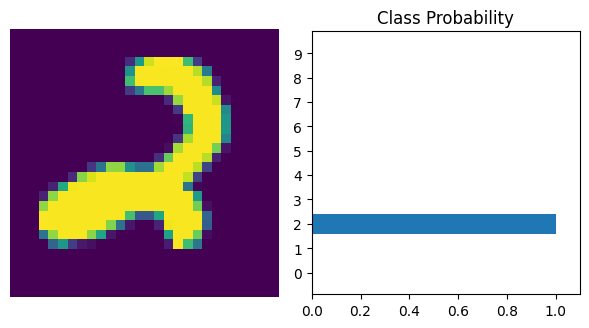

In [101]:
%matplotlib inline

# Loading test data
images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

Congratulations!!! You've trained a model to identify text from an image.

**Note on why the model isn't perfect right away:** In class, a few students asked why our model doesn't just "learn everything in one pass". There are many different reasons, but I will outline two key ones here:

First, the data is noisy. My "2" is not the same as your "2", which is different than both Marty's and Lillian's "2"s. It is also extremely likely that each "2: I write is (at least) minorly different in appearance. However, our brains have identified the general, abstract image of what a "2" looks like -- "half a heart, with a line at the bottom going to the right" (or something like that) -- but such a conceptual representation can be realized as an image in infinite different ways. As such, our model is trying to "learn" this abstract form from the data, meaning it needs to discover some complex representation of pixels that identifies a "2" from an "8". With each pass through the data, the model becomes better and better at identifying the complex patterns that lead it to the abstract "2" class.

Second, we are controlling how much the model can update at once.

To perform additional test analyses (model perplexity, etc.), you can pass the entire test data through the model without updating any parameters or performing backpropagation and keep track of the total loss. However, this is a different task for another time... (cue mysterious music...).

Anyway, that's it for this tutorial! Hope it helps :)